In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#"C:\Users\asus\CareerFoundry\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_merged.pkl"
path = r'C:\Users\asus\CareerFoundry\Instacart Basket Analysis'

In [ ]:
df_opcm = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

## Adressing PII

In [ ]:
df_opcm.head()

In [ ]:
df_opcm_without_PII = df_opcm.drop(columns = ['first_name', 'last_name'])

In [ ]:
df_opcm_without_PII.head()

In [ ]:
df_opcm_without_PII.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [ ]:
#"C:\Users\asus\CareerFoundry\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_wo_pii.pkl"
df_merged_wo_pii = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [ ]:
df_merged_wo_pii.head()

In [ ]:
df_merged_wo_pii['state'].value_counts(dropna = False)

In [ ]:
#result = []

#for value in ords_prods_merge["orders_day_of_week"]:
  #if value == 0:
  #  result.append("Busiest day")
 # elif value == 4:
  #  result.append("Least busy")
 # else:
#    result.append("Regularly busy")

In [ ]:
region = []
for value in df_merged_wo_pii['state']:
    if value == 'Rhode Island' or value == 'Massachusetts' or value == 'Connecticut' or value == 'New Hampshire' or value == 'Vermont' or value == 'Maine' or value == 'New Jersey' or value == 'New York' or value == 'Pennsylvania':
        region.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        region.append('Midwest')
    elif value == 'District of Columbia' or value == 'Alabama' or value == 'Arkansas' or value == 'Delaware' or value == 'Florida' or value == 'Georgia' or value == 'Kentucky' or value == 'Louisiana' or value == 'Maryland' or value == 'Mississippi' or value == 'North Carolina' or value == 'South Carolina' or value == 'Oklahoma' or value == 'Tennessee' or value == 'Texas' or value == 'Virginia' or value == 'West Virginia':
        region.append('South')
    else:
        region.append('West')

In [ ]:
region

In [ ]:
df_merged_wo_pii['region'] = region

In [ ]:
df_merged_wo_pii.head()

In [5]:
pd.options.display.max_columns = None

In [59]:
pd.options.display.max_rows = None

## Crosstab

In [ ]:
crosstab = pd.crosstab(df_merged_wo_pii['region'], df_merged_wo_pii['spending_flag'], dropna = False)

In [ ]:
crosstab.to_clipboard()

In [ ]:
df_merged_wo_pii.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [ ]:
df_merged_wo_pii = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [ ]:
df_merged_wo_pii.head()

# Exclusion Flag

In [ ]:
df_merged_wo_pii['max_order'].value_counts(dropna = False)

In [ ]:
#ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_merged_wo_pii.loc[df_merged_wo_pii['max_order'] >= 5, 'Activity_flag'] = 'High activity'

In [ ]:
#ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_merged_wo_pii.loc[df_merged_wo_pii['max_order'] < 5, 'Activity_flag'] = 'Low activity'

In [ ]:
#ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'
df_merged_wo_pii.head()

In [ ]:
df_merged_wo_pii['Activity_flag'].value_counts(dropna = False)

In [ ]:
df_merged_wo_pii = df_merged_wo_pii.drop(columns = ['Unnamed: 0_y'])

In [ ]:
df_merged_wo_pii.head()

In [ ]:
df_merged_wo_pii.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [3]:
df_merged_wo_pii = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii.pkl'))

In [6]:
df_merged_wo_pii.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


In [ ]:
df_merged_wo_pii.shape

In [ ]:
df_merged_wo_pii[df_merged_wo_pii['Activity_flag'] == 'High activity']

In [ ]:
df_merged_wo_pii['Activity_flag'].value_counts(dropna = False)

In [7]:
df_merged_HA = df_merged_wo_pii[df_merged_wo_pii['Activity_flag'] == 'High activity']

In [8]:
df_merged_HA['Activity_flag'].value_counts(dropna = False)

Activity_flag
High activity    30964564
Name: count, dtype: int64

In [9]:
df_merged_HA.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii_High_Activity.pkl'))

In [3]:
df_merged_ha = pd.read_pickle(r"C:\Users\asus\CareerFoundry\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_wo_pii_High_Activity.pkl")

In [16]:
df_merged_HA.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult


In [11]:
##ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_merged_HA.loc[(df_merged_HA['age'] >= 18) & (df_merged_HA['age'] <= 20), 'age_profile'] = 'Young adult'

C:\Users\asus\AppData\Local\Temp\ipykernel_17132\2397543937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_HA.loc[(df_merged_HA['age'] >= 18) & (df_merged_HA['age'] <= 20), 'age_profile'] = 'Young adult'


In [12]:
#ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_merged_HA.loc[(df_merged_HA['age'] >=21) & (df_merged_HA['age'] <=64), 'age_profile'] = 'Adult'

In [13]:
df_merged_HA.loc[df_merged_HA['age'] >=65, 'age_profile'] = 'Senior'

In [14]:
df_merged_HA.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult


In [56]:
df_merged_HA.shape

(30964564, 36)

In [15]:
df_merged_HA.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii_High_Activity.pkl'))

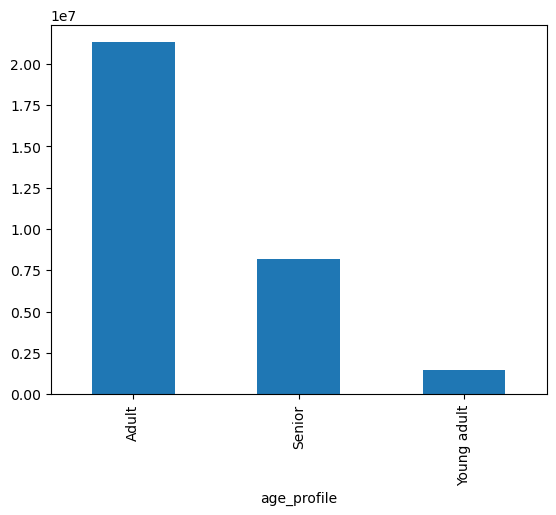

In [20]:
#bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
ag_bar = df_merged_HA['age_profile'].value_counts().sort_index().plot.bar()

In [22]:
#bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))
ag_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

In [29]:
df_merged_HA.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                16.160739   1  99
2                18.096481   1  99
3                17.856619   1  99
4                18.495730   1  99
5                16.034226   1  99
6                17.174694   1  99
7                17.901479   1  99
8                15.995927   1  99
9                16.633019   1  99
10               20.797555   1  99
11               16.933392   1  99
12               16.576910   1  99
13               17.328319   1  99
14               17.469987   1  99
15               16.933858   1  99
16               18.324695   1  99
17               16.438914   1  99
18               19.867090   1  99
19               17.830354   1  99
20               17.144802   1  99
21               24.281327   1  99

In [27]:
#df.groupby('department_id').agg({'order_number': ['mean', 'min', 'max']})
df_merged_HA.groupby('user_id').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order            
                          mean   min   max
user_id                                   
1                    20.259259   0.0  30.0
2                    15.967033   3.0  30.0
3                    11.487179   7.0  21.0
4                    15.357143   0.0  21.0
7                    13.546392   2.0  30.0
...                        ...   ...   ...
206203               29.103093  27.0  30.0
206206                4.042705   0.0  15.0
206207               14.879397   1.0  30.0
206208                7.442105   0.0  20.0
206209               20.275862   3.0  30.0

[162631 rows x 3 columns]

In [30]:
#ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)
df_merged_HA['mean_days_since_prior_order'] = df_merged_HA.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

C:\Users\asus\AppData\Local\Temp\ipykernel_17132\352838850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_HA['mean_days_since_prior_order'] = df_merged_HA.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)


In [31]:
df_merged_HA.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259


In [32]:
df_merged_HA.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii_High_Activity.pkl'))

In [34]:
#crosstab = pd.crosstab(df_merged_wo_pii['region'], df_merged_wo_pii['spending_flag'], dropna = False)
crosstab_ap_reg = pd.crosstab(df_merged_HA['region'], df_merged_HA['age_profile'], dropna = False)

In [36]:
crosstab_ap_reg.to_clipboard()

## Trail and error until next markdown

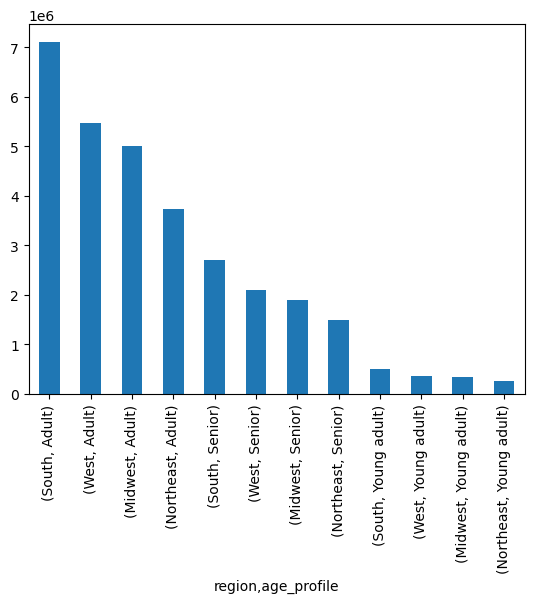

In [17]:
reg_bar = df_merged_ha[['region', 'age_profile']].value_counts().plot.bar()

In [55]:
df_merged_HA[df_merged_HA['region']== 'South']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404805,2371958,11534,8,4,12,2.0,42387,1,1,both,Natural 8 fl oz Alpine Spring Water,115,7,10.5,NaN,Mid-range-product,Least busy,Least busy,Average orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity,Senior,6.181818
32404806,2462548,11534,9,1,8,4.0,42387,1,1,both,Natural 8 fl oz Alpine Spring Water,115,7,10.5,NaN,Mid-range-product,Regularly busy,Busiest days,Average orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity,Senior,6.181818
32404807,1367873,11534,10,1,10,7.0,42387,1,1,both,Natural 8 fl oz Alpine Spring Water,115,7,10.5,NaN,Mid-range-product,Regularly busy,Busiest days,Most orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity,Senior,6.181818
32404808,2376815,11534,11,1,9,7.0,42387,1,1,both,Natural 8 fl oz Alpine Spring Water,115,7,10.5,NaN,Mid-range-product,Regularly busy,Busiest days,Average orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity,Senior,6.181818


In [58]:
df_merged_HA.groupby('department_id').agg({'region': ['count']})

,region
,count
department_id,
1,2121731
2,34411
3,1120828
4,9079273
5,144627
6,255991
7,2571901
8,93060


In [43]:
crosstab_reg_depart.to_clipboard()

In [3]:
#"C:\Users\asus\CareerFoundry\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_customers_wo_pii_High_Activity.pkl"
df_merged_ha = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii_High_Activity.pkl'))

In [6]:
df_merged_ha.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,NaN,Mid-range-product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259


In [6]:
df_merged_ha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404854
Data columns (total 36 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     int64   
 1   user_id                      int64   
 2   order_number                 int64   
 3   orders_day_of_week           int64   
 4   order_hour_of_day            int64   
 5   days_since_prior_order       float64 
 6   product_id                   int64   
 7   add_to_cart_order            int64   
 8   reordered                    int64   
 9   _merge                       category
 10  product_name                 object  
 11  aisle_id                     int64   
 12  department_id                int64   
 13  prices                       float64 
 14  prices_range_loc             object  
 15  price_range_loc              object  
 16  Busiest Day                  object  
 17  Busiest Days                 object  
 18  busiest_period_of_day    

In [11]:
df_merged_ha['region'].value_counts(dropna = False)

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

In [44]:
df_merged_ha[['region']]

,region
0,South
1,South
2,South
3,South
4,South
...,...
32404850,West
32404851,West
32404852,West
32404853,West


## Making DF per region

In [46]:
df_south = df_merged_ha[df_merged_ha['region']== 'South']

In [48]:
df_south.shape

(10311139, 36)

In [47]:
df_south.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
4,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259


In [49]:
df_south.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_south.pkl'))

In [56]:
df_west = df_merged_ha[df_merged_ha['region']== 'West']

In [57]:
df_west.shape

(7927227, 36)

In [58]:
df_west.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
335,1573906,21,10,3,10,6.0,196,2,0,both,...,Montana,71,6/18/2019,0,divorced/widowed,124643,West,High activity,Senior,10.055
336,3341737,21,33,1,12,30.0,49235,14,0,both,...,Montana,71,6/18/2019,0,divorced/widowed,124643,West,High activity,Senior,10.055
337,1082944,21,14,1,9,10.0,47766,6,0,both,...,Montana,71,6/18/2019,0,divorced/widowed,124643,West,High activity,Senior,10.055
338,774475,21,16,1,11,7.0,47766,4,1,both,...,Montana,71,6/18/2019,0,divorced/widowed,124643,West,High activity,Senior,10.055
339,77791,21,19,3,9,8.0,47766,13,1,both,...,Montana,71,6/18/2019,0,divorced/widowed,124643,West,High activity,Senior,10.055


In [59]:
df_west.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_west.pkl'))

In [60]:
df_midwest = df_merged_ha[df_merged_ha['region']== 'Midwest']

In [61]:
df_midwest.shape

(7261513, 36)

In [62]:
df_midwest.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
59,2968173,15,15,1,9,7.0,196,2,0,both,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,Senior,11.029412
60,1870022,15,17,2,16,8.0,196,6,1,both,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,Senior,11.029412
61,1911383,15,18,2,11,7.0,196,1,1,both,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,Senior,11.029412
62,2715276,15,21,1,9,7.0,196,1,1,both,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,Senior,11.029412
63,487368,15,22,1,10,14.0,196,1,1,both,...,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,High activity,Senior,11.029412


In [63]:
df_midwest.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_midwest.pkl'))

In [7]:
df_northeast = df_merged_ha[df_merged_ha['region']== 'Northeast']

In [8]:
df_northeast.shape

(5464685, 36)

In [9]:
df_northeast.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,prices_range_loc,price_range_loc,Busiest Day,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,Median_frequency,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
1441,1403849,109,3,3,17,9.0,196,5,0,both,Soda,77,7,9.0,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,7/29/2018,1,married,41805,Northeast,High activity,Senior,21.85
1442,3116901,109,5,0,7,26.0,47144,5,0,both,Unsweetened Original Almond Breeze Almond Milk,91,16,14.0,NaN,Mid-range-product,Busiest day,Busiest days,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,7/29/2018,1,married,41805,Northeast,High activity,Senior,21.85
1443,1382150,109,6,1,9,15.0,5450,8,0,both,Small Hass Avocado,24,4,8.8,NaN,Mid-range-product,Regularly busy,Busiest days,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,7/29/2018,1,married,41805,Northeast,High activity,Senior,21.85
1444,3116901,109,5,0,7,26.0,9387,18,0,both,Granny Smith Apples,24,4,8.8,NaN,Mid-range-product,Busiest day,Busiest days,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,7/29/2018,1,married,41805,Northeast,High activity,Senior,21.85
1445,1403849,109,3,3,17,9.0,11777,1,0,both,Red Raspberries,123,4,10.5,NaN,Mid-range-product,Regularly busy,Least busy,Average orders,6,New customer,5.850725,Low spender,26.0,Non-frequent customer,Female,Connecticut,67,7/29/2018,1,married,41805,Northeast,High activity,Senior,21.85


In [10]:
df_northeast.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_northeast.pkl'))

In [3]:
df_merged_ha = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_wo_pii_High_Activity.pkl'))

In [4]:
df_merged_ha.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,number_of_dependants,marital_status,income,region,Activity_flag,age_profile,mean_days_since_prior_order
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259
4,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,Adult,20.259259


In [8]:
df_merged_ha['max_order'].value_counts(dropna = False)

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: count, Length: 95, dtype: int64

## Graphs made to look at data in a different way

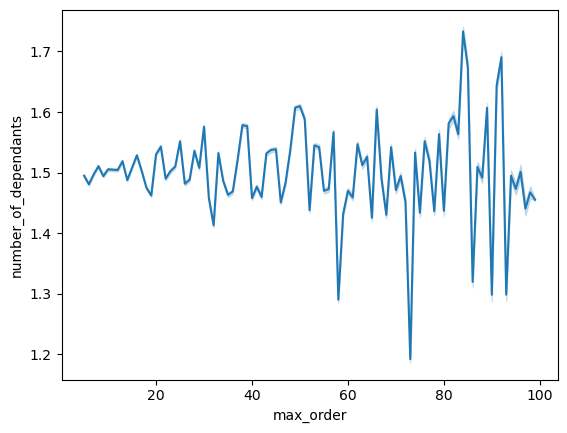

In [10]:
#line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')
line_sales_age = sns.lineplot(data = df_merged_ha, x = 'max_order', y = 'number_of_dependants')

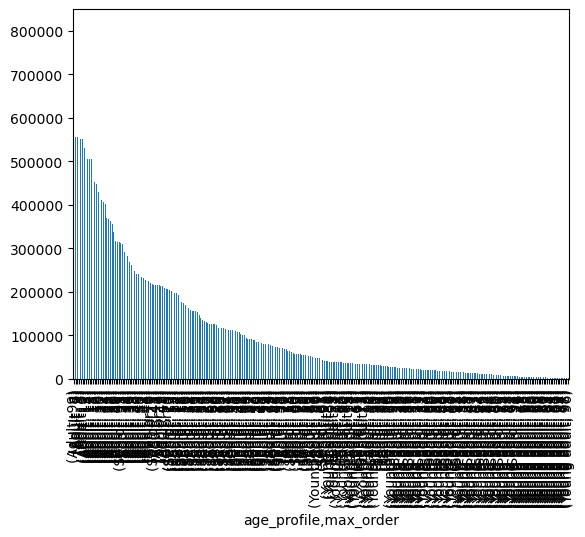

In [15]:
bar_age_nod = df_merged_ha[['age_profile', 'max_order']].value_counts().plot.bar()

KeyboardInterrupt: 

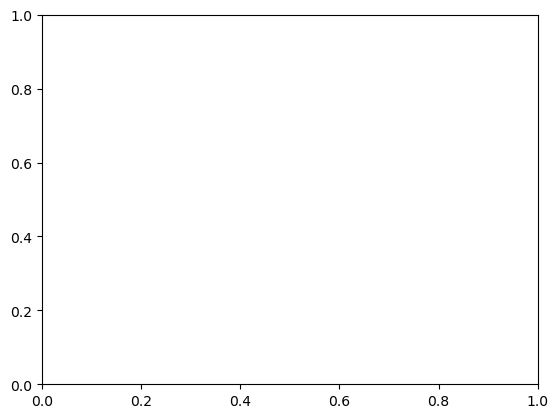

In [20]:
line_nod_age = sns.lineplot(data = df_merged_ha, x = 'number_of_dependants', y = 'max_order')

In [22]:
reg_bar

<Axes: xlabel='region,age_profile'>

In [19]:
reg_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age_profile_bar.png'))

In [21]:
line_sales_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sales_age_bar.png'))

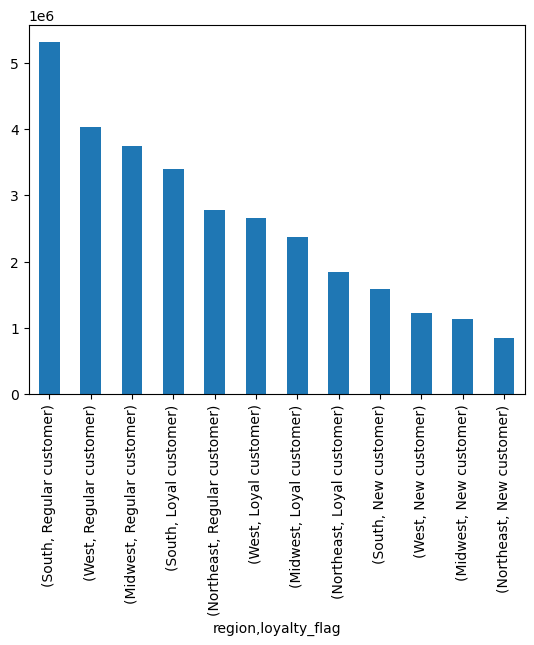

In [25]:
bar_customer_region = df_merged_ha[['region', 'loyalty_flag']].value_counts().plot.bar()

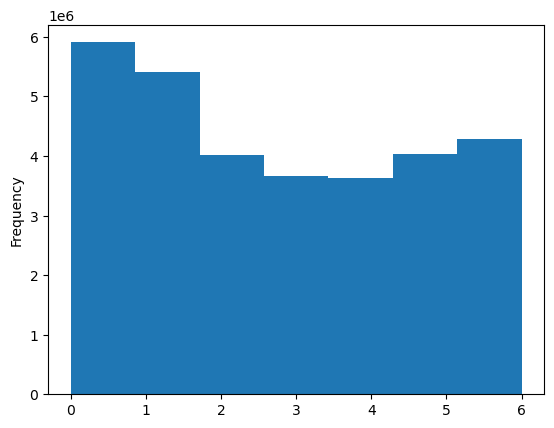

In [27]:
#hist = ords_prods_cust_merged['order_hour_of_day'].plot.hist(bins = 24)
hist_odow = df_merged_ha['orders_day_of_week'].plot.hist(bins = 7)

In [28]:
hist_odow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'ordors_days_of_week_hist.png'))